<a href="https://colab.research.google.com/github/OliverWard4/ECGRML/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score,
                            confusion_matrix, ConfusionMatrixDisplay,
                            classification_report)


In [218]:
# Configuration
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

In [211]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [213]:
# Load data
file_path = "/content/drive/MyDrive/Algerian_forest_fires_dataset.csv"
df = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Algerian_forest_fires_dataset.csv'

In [220]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [222]:
# Clean column names
df.columns = df.columns.str.strip()

# Add Region column (1 for first 122 rows, 2 for rest)
df['Region'] = np.where(df.index < 122, 1, 2)

# Handle missing values
df = df.dropna().reset_index(drop=True)

# Clean 'Classes' column
df['Classes'] = df['Classes'].str.strip()
df = df[df['Classes'].isin(['fire', 'not fire'])]

In [224]:
# Convert data types
df1 = df.copy()
df1['Temperature'] = pd.to_numeric(df1['Temperature'], errors='coerce')
df1 = df1.dropna().reset_index(drop=True)

type_conversions = {
    'RH': np.int64, 'Temperature': np.int64,
    'Ws': np.int64, 'Rain': np.float64,
    'FFMC': np.float64, 'DMC': np.float64,
    'DC': np.float64, 'ISI': np.float64,
    'BUI': np.float64, 'FWI': np.float64
}
df1 = df1.astype(type_conversions)

In [226]:
# Save cleaned data
df1.to_csv('forest_fires.csv', index=False)

In [228]:
# Basic info
print("Data Shape:", df1.shape)
print("\nData Types:")
print(df1.dtypes)
print("\nMissing Values:")
print(df1.isnull().sum())
print("\nClass Distribution:")
print(df1['Classes'].value_counts())

Data Shape: (243, 15)

Data Types:
day             object
month           object
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

Missing Values:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Class Distribution:
Classes
fire        137
not fire    106
Name: count, dtype: int64


In [230]:
# Numeric and categorical columns
numeric_col = [col for col in df1.columns if df1[col].dtype != 'object']
object_col = [col for col in df1.columns if df1[col].dtype == 'object']

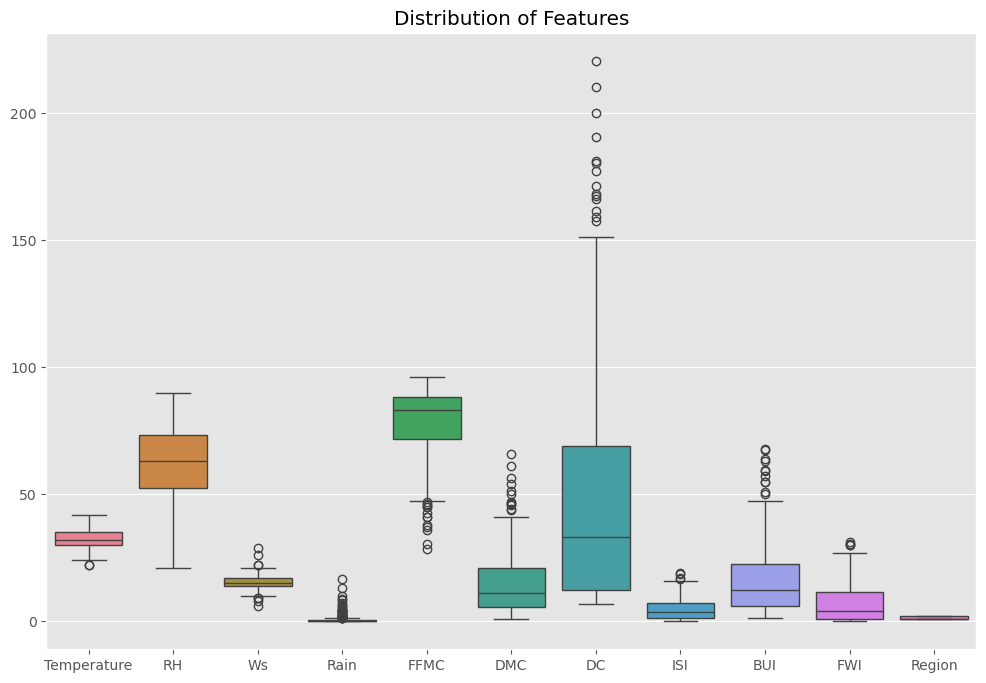

In [232]:
# Boxplot of numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[numeric_col])
plt.title('Distribution of Features')
plt.show()

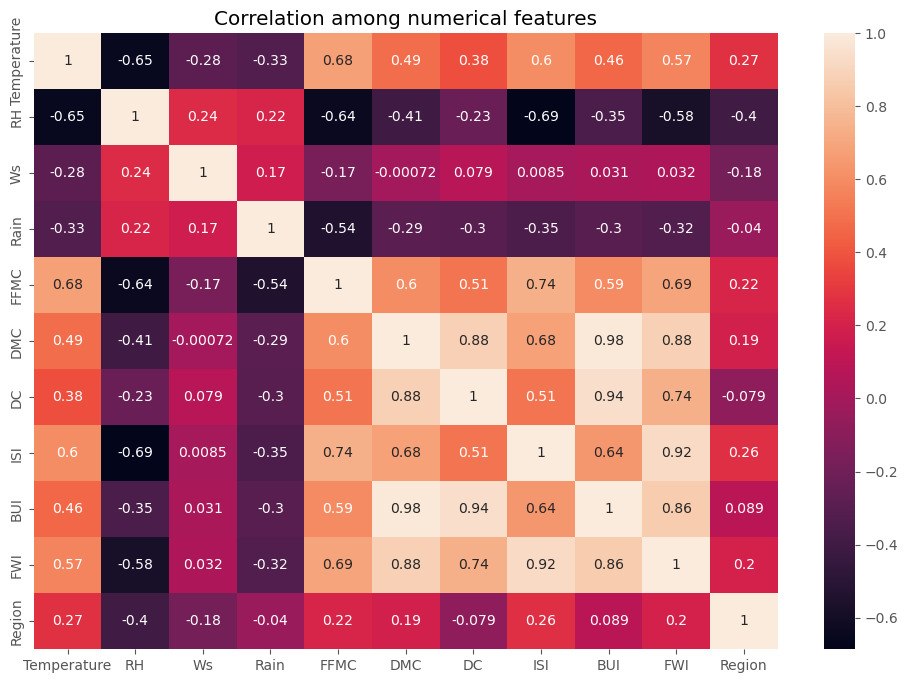

In [234]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df1 = df1.select_dtypes(include=np.number)
sns.heatmap(numeric_df1.corr(), annot=True)
plt.title('Correlation among numerical features')
plt.show()

In [235]:
# Prepare data for modeling
X = df1.drop(['Classes', 'day', 'month', 'year'], axis=1)
y = df1['Classes']

In [237]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [240]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the data into train, validation, and test sets
# Here, we'll split 80% for training, 10% for validation, and 10% for testing
X_train_full, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# 2. Scale the features using StandardScaler
scaler = StandardScaler()

# Scale X_train_full, X_val, and X_test
X_train_scaled = scaler.fit_transform(X_train_full)  # Fit and transform on the training set
X_val_scaled = scaler.transform(X_val)               # Transform the validation set
X_test_scaled = scaler.transform(X_test)

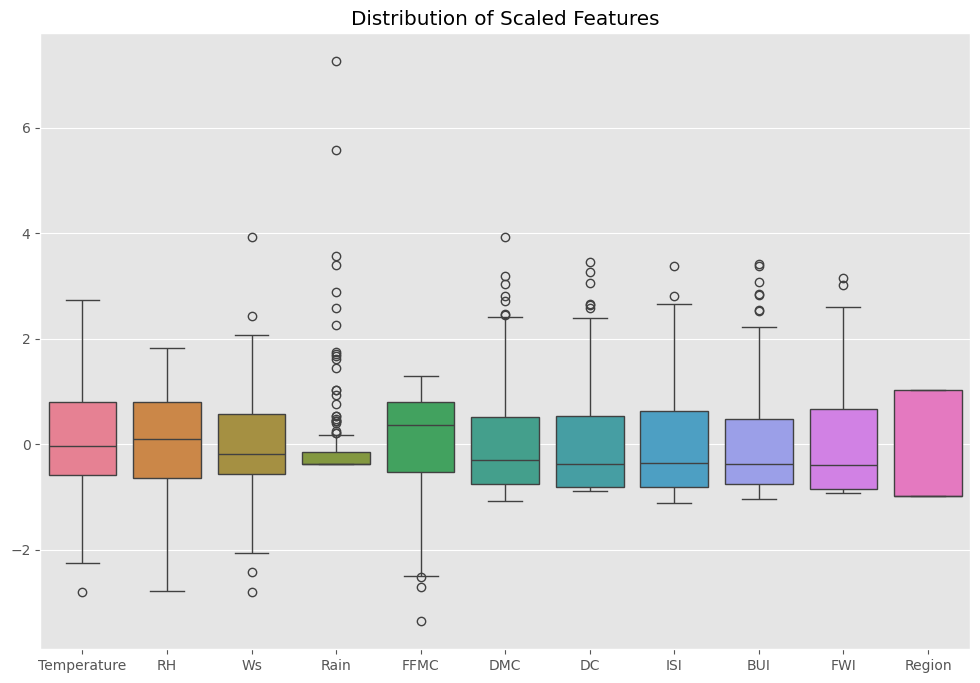

In [256]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=X_train.columns)) # Use scaled data
plt.title('Distribution of Scaled Features')
plt.show()


In [258]:
# Logistic Regression Model
log_reg = LogisticRegression(penalty=None, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


In [262]:
from sklearn.metrics import accuracy_score

# Predictions on training data
y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9836065573770492
Validation Accuracy:  0.9473684210526315


In [264]:
# Evaluation metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='fire'):.4f}")

Logistic Regression Performance:
Accuracy: 0.9836
Precision: 0.9737
Recall: 1.0000
F1 Score: 0.9867


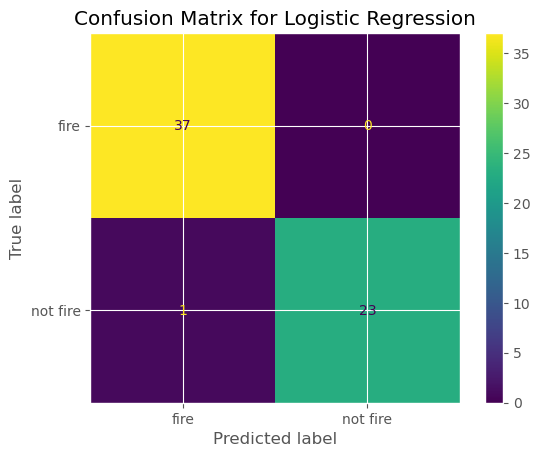


Classification Report:
              precision    recall  f1-score   support

        fire       0.97      1.00      0.99        37
    not fire       1.00      0.96      0.98        24

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



In [266]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

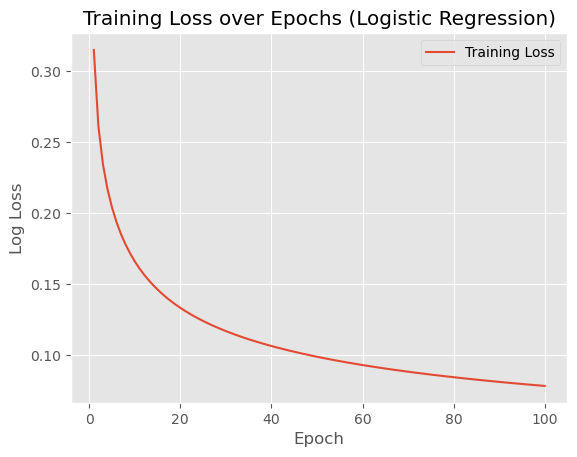

In [187]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

train_losses = []

# Create an SGD-based logistic regression model
log_reg = SGDClassifier(loss='log_loss', max_iter=1, penalty=None, learning_rate='constant', eta0=0.01, warm_start=True)

epochs = 100

for epoch in range(epochs):
    log_reg.fit(X_train_scaled, y_train)  # warm_start=True keeps previous weights
    y_proba = log_reg.predict_proba(X_train_scaled)
    loss = log_loss(y_train, y_proba)
    train_losses.append(loss)

# Plotting the training loss
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training Loss over Epochs (Logistic Regression)')
plt.grid(True)
plt.legend()
plt.show()

In [170]:
from sklearn.neighbors import KNeighborsClassifier

#declare model
knn = KNeighborsClassifier(n_neighbors=5)

#train model
knn.fit(X_train_scaled, y_train)

#predict
y_pred = knn.predict(X_test_scaled)


In [172]:
# Evaluation metrics for K- nearest neighbors
print("K- nearest neighbors Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='fire'):.4f}")

K- nearest neighbors Regression Performance:
Accuracy: 0.9180
Precision: 0.9444
Recall: 0.9189
F1 Score: 0.9315


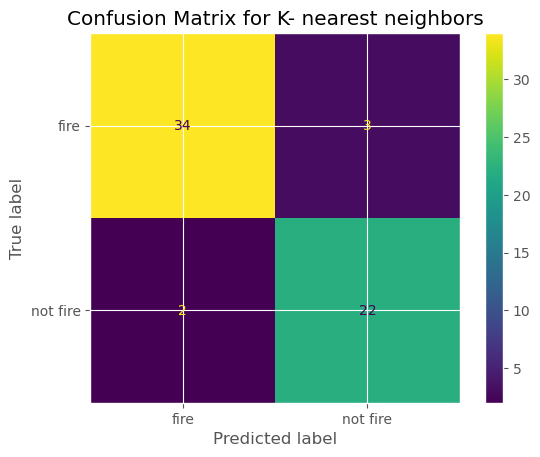


Classification Report:
              precision    recall  f1-score   support

        fire       0.94      0.92      0.93        37
    not fire       0.88      0.92      0.90        24

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.91        61
weighted avg       0.92      0.92      0.92        61



In [174]:
# Confusion Matrix for K- nearest neighbors
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix for K- nearest neighbors')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [179]:
from sklearn.naive_bayes import GaussianNB

#declares the guassian Naive Bayes model
NB = GaussianNB()

#trains the model
NB.fit(X_train_scaled, y_train)

#runs our prediction
y_pred = NB.predict(X_test_scaled)

In [181]:
# Evaluation metrics for Gaussian Naive Bayes
print("Guassian")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='fire'):.4f}")

K- nearest neighbors Regression Performance:
Accuracy: 0.9344
Precision: 0.9459
Recall: 0.9459
F1 Score: 0.9459


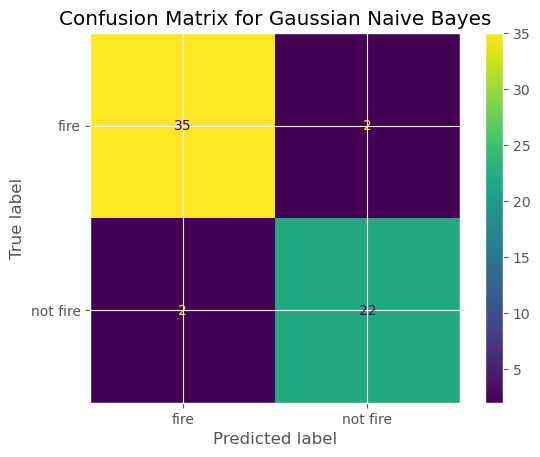


Classification Report:
              precision    recall  f1-score   support

        fire       0.95      0.95      0.95        37
    not fire       0.92      0.92      0.92        24

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [183]:
# Confusion Matrix for Gaussian Naive Bayes
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

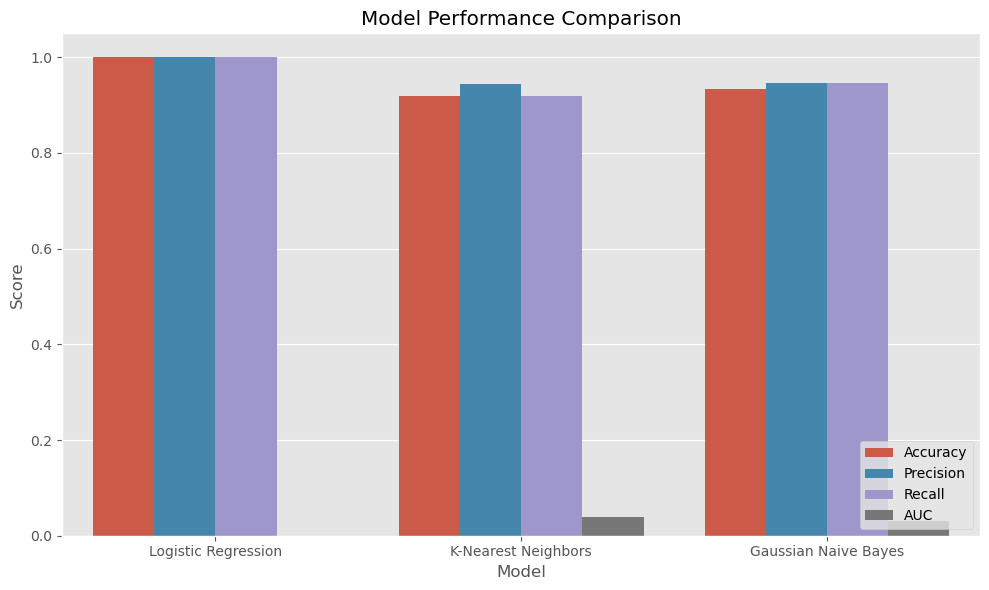

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define models
models = {
    'Logistic Regression': LogisticRegression(penalty=None, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gaussian Naive Bayes': GaussianNB()
}

# Collect results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='fire'),
        'Recall': recall_score(y_test, y_pred, pos_label='fire'),
        'AUC': roc_auc_score((y_test == 'fire').astype(int), y_proba)
    })

# Convert to long format for seaborn
df_results = pd.DataFrame(results)
df_long = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.05)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
